In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [101]:
food_supply = pd.read_csv('data/food supply.csv')
food_production = pd.read_csv('data/food production.csv')
food_supply

Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]

In [102]:
food_supply.Year = pd.to_datetime(food_supply["Year"],format="%Y")
food_supply.dtypes

Country            object
Year       datetime64[ns]
Value               int64
dtype: object

In [44]:
# df_foodsupply = pd.DataFrame(food_supply)
# df_foodproduction = pd.DataFrame(food_production)

In [103]:
food_production.Year = pd.to_datetime(food_production["Year"],format="%Y")
food_production.dtypes

Country            object
Item               object
Year       datetime64[ns]
Value               int64
dtype: object

In [104]:
food_supply["new_value"] = food_supply["Value"].values.astype(str)
food_supply["new_value"] = food_supply["Value"].fillna("").astype(str) + "kt"

In [105]:
food_supply

Country       Year  Value new_value
0     Algeria 2004-01-01   2987    2987kt
1     Algeria 2005-01-01   2958    2958kt
2     Algeria 2006-01-01   3047    3047kt
3     Algeria 2007-01-01   3041    3041kt
4     Algeria 2008-01-01   3048    3048kt
..        ...        ...    ...       ...
445  Zimbabwe 2009-01-01   2147    2147kt
446  Zimbabwe 2010-01-01   2168    2168kt
447  Zimbabwe 2011-01-01   2200    2200kt
448  Zimbabwe 2012-01-01   2197    2197kt
449  Zimbabwe 2013-01-01   2110    2110kt

[450 rows x 4 columns]

In [106]:
food_production["new_value"] = food_production["Value"].values.astype(str)
food_production["new_value"] = food_production["Value"].fillna("").astype(str) + 'kt'

In [107]:
food_production

Country                Item       Year  Value new_value
0       Algeria  Wheat and products 2004-01-01   2731    2731kt
1       Algeria  Wheat and products 2005-01-01   2415    2415kt
2       Algeria  Wheat and products 2006-01-01   2688    2688kt
3       Algeria  Wheat and products 2007-01-01   2319    2319kt
4       Algeria  Wheat and products 2008-01-01   1111    1111kt
...         ...                 ...        ...    ...       ...
23105  Zimbabwe         Crustaceans 2009-01-01      0       0kt
23106  Zimbabwe         Crustaceans 2010-01-01      0       0kt
23107  Zimbabwe         Crustaceans 2011-01-01      0       0kt
23108  Zimbabwe         Crustaceans 2012-01-01      0       0kt
23109  Zimbabwe         Crustaceans 2013-01-01      0       0kt

[23110 rows x 5 columns]

In [108]:
df_foodsupply = pd.DataFrame(food_supply)
df_foodsupply
df_foodproduction = pd.DataFrame(food_production)

In [109]:
grouped_foodsupply = food_supply.groupby(["Country", "Year"])["new_value"]
grouped_foodsupply.first()

Country   Year      
Algeria   2004-01-01    2987kt
          2005-01-01    2958kt
          2006-01-01    3047kt
          2007-01-01    3041kt
          2008-01-01    3048kt
                         ...  
Zimbabwe  2009-01-01    2147kt
          2010-01-01    2168kt
          2011-01-01    2200kt
          2012-01-01    2197kt
          2013-01-01    2110kt
Name: new_value, Length: 450, dtype: object

In [110]:
grouped_foodproduction = food_production.groupby(["Country", "Year", "Item"])["Value"].sum()
grouped_foodproduction

Country   Year        Item                 
Algeria   2004-01-01  Apples and products       165
                      Bananas                     0
                      Barley and products      1212
                      Beans                       2
                      Beer                      110
                                               ... 
Zimbabwe  2013-01-01  Tea (including mate)       19
                      Tomatoes and products      24
                      Vegetables, Other         203
                      Wheat and products         25
                      Wine                        2
Name: Value, Length: 23110, dtype: int64

In [16]:
# for key, item in grouped_foodsupply:
#     print(grouped_foodsupply.get_group(key))
# for Country, Year in grouped_foodsupply:
#     print(Country)
#     print(Year)
# grouped_foodsupply.get_group(('Country','Year'))

In [111]:
sum_foodsupply = pd.DataFrame(food_supply.groupby(['Country','Year'],as_index=False)['Value'].sum())
sum_foodsupply

Country       Year  Value
0     Algeria 2004-01-01   2987
1     Algeria 2005-01-01   2958
2     Algeria 2006-01-01   3047
3     Algeria 2007-01-01   3041
4     Algeria 2008-01-01   3048
..        ...        ...    ...
445  Zimbabwe 2009-01-01   2147
446  Zimbabwe 2010-01-01   2168
447  Zimbabwe 2011-01-01   2200
448  Zimbabwe 2012-01-01   2197
449  Zimbabwe 2013-01-01   2110

[450 rows x 3 columns]

In [ ]:
#  food_supply["Value"] = int(input("Value:- "))
#  To_kt = 0.001*Value
#  print(Ton,"Value = ",To_kt,"Kt")

In [112]:
sum_foodproduction = pd.DataFrame(food_production.groupby(['Country','Year','Item'],as_index=False)['Value'].sum())
sum_foodproduction

Country       Year                   Item  Value
0       Algeria 2004-01-01    Apples and products    165
1       Algeria 2004-01-01                Bananas      0
2       Algeria 2004-01-01    Barley and products   1212
3       Algeria 2004-01-01                  Beans      2
4       Algeria 2004-01-01                   Beer    110
...         ...        ...                    ...    ...
23105  Zimbabwe 2013-01-01   Tea (including mate)     19
23106  Zimbabwe 2013-01-01  Tomatoes and products     24
23107  Zimbabwe 2013-01-01      Vegetables, Other    203
23108  Zimbabwe 2013-01-01     Wheat and products     25
23109  Zimbabwe 2013-01-01                   Wine      2

[23110 rows x 4 columns]

In [40]:
# df_foodsupply = pd.DataFrame(sum_foodsupply)
# df_foodsupply
# df_foodproduction = pd.DataFrame(sum_foodproduction)
# df_foodproduction

Value
Country  Year             
Algeria  2004-01-01  15536
         2005-01-01  15667
         2006-01-01  16417
         2007-01-01  14763
         2008-01-01  13841
...                    ...
Zimbabwe 2009-01-01   5754
         2010-01-01   6777
         2011-01-01   7551
         2012-01-01   8173
         2013-01-01   7914

[450 rows x 1 columns]

In [113]:

import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)


In [135]:
px.histogram(sum_foodproduction, x="Year", color='Item', y='Value', barmode='overlay')

# df_foodproduction.plot()
# plt.scatter(df_foodproduction['Item'], df_foodproduction['Year'])
# plt.show()

In [115]:
fig = px.treemap(sum_foodproduction, path =['Country','Item','Year'], values ='Value')
fig.show()

In [129]:
fig = px.bar(sum_foodsupply, x='Year', y="Value", color='Country', barmode='overlay')
#              facet_row='time', facet_col='sex')
  
fig.show()

In [89]:
summ_foodsupply = food_supply.groupby(['Country','Year',])['Value'].agg(['sum'])
summ_foodsupply

sum
Country  Year            
Algeria  2004-01-01  2987
         2005-01-01  2958
         2006-01-01  3047
         2007-01-01  3041
         2008-01-01  3048
...                   ...
Zimbabwe 2009-01-01  2147
         2010-01-01  2168
         2011-01-01  2200
         2012-01-01  2197
         2013-01-01  2110

[450 rows x 1 columns]

In [29]:
# fig = px.line(summ_foodsupply, y="Country", line_dash='Value',
#               color='Year')
  
# showing the plot
# fig.show()

In [35]:
bool_series = pd.isnull(sum_foodproduction["Value"]) 
    
# filtering data 
# displaying data only with Value = NaN 
sum_foodproduction[bool_series]

Empty DataFrame
Columns: [Country, Year, Item, Value]
Index: []

In [36]:
bool_series = pd.isnull(sum_foodsupply["Value"]) 
    
# filtering data 
# displaying data only with Value = NaN 
sum_foodsupply[bool_series]

Empty DataFrame
Columns: [Country, Year, Value]
Index: []

<AxesSubplot:>

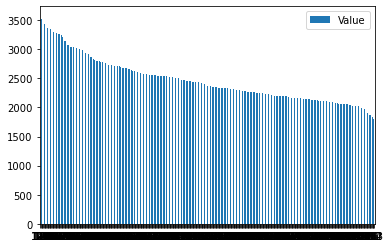

In [81]:
sum_foodsupply.sort_values('Value', ascending=False)[['Value']].plot.bar(rot=0)
# plot.show()

In [87]:
sum_foodproduction.sort_values('Value', ascending=False)[['Value']].plot.bar(rot=0, figsize=(10,5))

<AxesSubplot:>

Error in callback <function flush_figures at 0x000001EAC2DCB9D0> (for post_execute):


KeyboardInterrupt: 

In [85]:
top_supply =sum_foodsupply.sort_values(by=['Value'], ascending=False)
top_supply.head(10)

Country       Year  Value
128    Egypt 2012-01-01   3561
127    Egypt 2011-01-01   3549
129    Egypt 2013-01-01   3522
126    Egypt 2010-01-01   3507
124    Egypt 2008-01-01   3490
123    Egypt 2007-01-01   3445
125    Egypt 2009-01-01   3441
279  Morocco 2013-01-01   3403
408  Tunisia 2012-01-01   3390
122    Egypt 2006-01-01   3389

In [93]:
top_production =sum_foodproduction.sort_values(by=['Value'], ascending=False)
top_production.head(20)

Country       Year                  Item  Value
15872  Nigeria 2012-01-01  Cassava and products  54000
15933  Nigeria 2013-01-01  Cassava and products  53000
15811  Nigeria 2011-01-01  Cassava and products  52403
15506  Nigeria 2006-01-01  Cassava and products  45721
15628  Nigeria 2008-01-01  Cassava and products  44582
15567  Nigeria 2007-01-01  Cassava and products  43410
15750  Nigeria 2010-01-01  Cassava and products  42533
15445  Nigeria 2005-01-01  Cassava and products  41565
15989  Nigeria 2013-01-01                  Yams  40500
15928  Nigeria 2012-01-01                  Yams  40000
15384  Nigeria 2004-01-01  Cassava and products  38845
15867  Nigeria 2011-01-01                  Yams  37116
15689  Nigeria 2009-01-01  Cassava and products  36822
15562  Nigeria 2006-01-01                  Yams  36720
15684  Nigeria 2008-01-01                  Yams  35017
15806  Nigeria 2010-01-01                  Yams  34162
15501  Nigeria 2005-01-01                  Yams  34000
15440  Nigeria 2004-01-01                  Yams  31776
15623  Nigeria 2007-01-01                  Yams  31136
15745  Nigeria 2009-01-01                  Yams  29092

In [116]:
# plotting the boxplot
fig = px.box(sum_foodsupply, x="Year", y="Value")
  
# showing the plot
fig.show()

In [128]:
# # making data frame from csv file
# data = pd.read_csv('data/food supply.csv', index_col ='Item')
  
# # retrieving rows by loc method
# rows = data.loc[["Rice"]]
  
# # checking data type of rows
# # print(type(rows))
  
# # display
# rows
# rice =sum_foodproduction.loc['Wheat and products']
# rice
sum_foodproduction

Country       Year                   Item  Value
0       Algeria 2004-01-01    Apples and products    165
1       Algeria 2004-01-01                Bananas      0
2       Algeria 2004-01-01    Barley and products   1212
3       Algeria 2004-01-01                  Beans      2
4       Algeria 2004-01-01                   Beer    110
...         ...        ...                    ...    ...
23105  Zimbabwe 2013-01-01   Tea (including mate)     19
23106  Zimbabwe 2013-01-01  Tomatoes and products     24
23107  Zimbabwe 2013-01-01      Vegetables, Other    203
23108  Zimbabwe 2013-01-01     Wheat and products     25
23109  Zimbabwe 2013-01-01                   Wine      2

[23110 rows x 4 columns]

In [137]:
 rice =sum_foodproduction.iloc['2010-01-01']
rice

TypeError: Cannot index by location index with a non-integer key

In [133]:
item_foodproduction = pd.DataFrame(food_production.groupby(['Country','Year','Item'],as_index=False)['Item'].count())
item_foodproduction

Country       Year  Item
0       Algeria 2004-01-01     1
1       Algeria 2004-01-01     1
2       Algeria 2004-01-01     1
3       Algeria 2004-01-01     1
4       Algeria 2004-01-01     1
...         ...        ...   ...
23105  Zimbabwe 2013-01-01     1
23106  Zimbabwe 2013-01-01     1
23107  Zimbabwe 2013-01-01     1
23108  Zimbabwe 2013-01-01     1
23109  Zimbabwe 2013-01-01     1

[23110 rows x 3 columns]